**Objective:** Implement a simple ann (artificial neural network)

**Dataset Used:** https://www.kaggle.com/datasets/uciml/iris

***Preprocessing***

**1.) Importing the necessary modules** 

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import  transforms
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split

**2.) Loading the dataset**

In [2]:
data=pd.read_csv(r"C:\Users\Devab\OneDrive\Desktop\Coding\ML-DL\Deep Learning\Applications\Iris.csv")

In [3]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


**3.) Encoding the species names into numerical form**

In [4]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

data["Species"]=encoder.fit_transform(data["Species"])

**4.) Dropping the id column**

In [5]:
data.drop("Id",axis=1,inplace=True)

<hr>

***Building the nerual network***

**1.) Creating the neural network using oops**

In [6]:
class Model(nn.Module):
    
    # The init function creates the basic network structure
    def __init__(self,in_features=4,h1=10,h2=10,h3=10,out_features=3):
        super().__init__() #This is to initialise the nn.module
        
        self.fc1=nn.Linear(in_features,h1) #This is to connect the input layer with the 1st hidden layer
        self.fc2=nn.Linear(h1,h2) #This is to connect the 1st hidden layer  with the 2nd hidden layer
        self.fc3=nn.Linear(h2,h3) #This is to connect the 2nd layer with the 3rd hidden layer
        self.out=nn.Linear(h3,out_features) #This is to connect the 3rd hidden layer with the output layer
        
    # The forward function sets the actvation functions for the hidden layers 
    
    def forward(self,x):
        x=F.relu(self.fc1(x))
        x=F.relu(self.fc2(x))
        x=F.relu(self.fc3(x))
        x=self.out(x)
        
        return x

**2.) Picking a random seed and Creating an instance of the model**

In [7]:
torch.manual_seed(41)

model=Model()

**3.) Choosing the criterion and the optimiser**

In [8]:
crit=nn.CrossEntropyLoss()

optimiser=torch.optim.Adam(model.parameters(),lr=0.01)

**4.) Splitting the dataset into features and target variable**

In [9]:
y=data["Species"]
x=data.drop("Species",axis=1)

# Converting them into numpy arrays
X=np.array(x)
y=np.array(y)

**5.) Splitting into train and test data**

In [10]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

**6.) Converting into tensors**

In [11]:
X_train=torch.tensor(X_train,dtype=torch.float32)
X_test=torch.tensor(X_test,dtype=torch.float32)

# Converting y_train and y_test into integer tensors

y_train=torch.tensor(y_train,dtype=torch.long)
y_test=torch.tensor(y_test,dtype=torch.long)

<hr>

***Training the model***

**1.) Setting the number of epochs and a list to store the losses**

In [12]:
epochs=200
losses=[]

**2.) Training the model**

In [13]:
for i in range(epochs):
    # getting the predictions using forward propagation
    y_pred=model.forward(X_train)
    
    # Calculating the loss 
    loss=crit(y_pred,y_train)
    
    # Appending all the losses into the list 
    
    losses.append(loss.detach().numpy()) # Converting the loss from a tensor into a numpy array
    
    if i % 10 == 0:
        print(f'Epoch: {i} and loss: {loss}')
        
    # Performing backpropagation to reduce the losses 
    
    optimiser.zero_grad()
    loss.backward()
    optimiser.step()

Epoch: 0 and loss: 1.1689952611923218
Epoch: 10 and loss: 1.0564897060394287
Epoch: 20 and loss: 0.8515352010726929
Epoch: 30 and loss: 0.6417908668518066
Epoch: 40 and loss: 0.3799574673175812
Epoch: 50 and loss: 0.16731588542461395
Epoch: 60 and loss: 0.08141706883907318
Epoch: 70 and loss: 0.06469689309597015
Epoch: 80 and loss: 0.061653245240449905
Epoch: 90 and loss: 0.059943318367004395
Epoch: 100 and loss: 0.05867287516593933
Epoch: 110 and loss: 0.05940330773591995
Epoch: 120 and loss: 0.057009369134902954
Epoch: 130 and loss: 0.056603241711854935
Epoch: 140 and loss: 0.05594274029135704
Epoch: 150 and loss: 0.05549178645014763
Epoch: 160 and loss: 0.05502963811159134
Epoch: 170 and loss: 0.05460098385810852
Epoch: 180 and loss: 0.05421056970953941
Epoch: 190 and loss: 0.05385488271713257


**3.) Visualising the reduction in error**

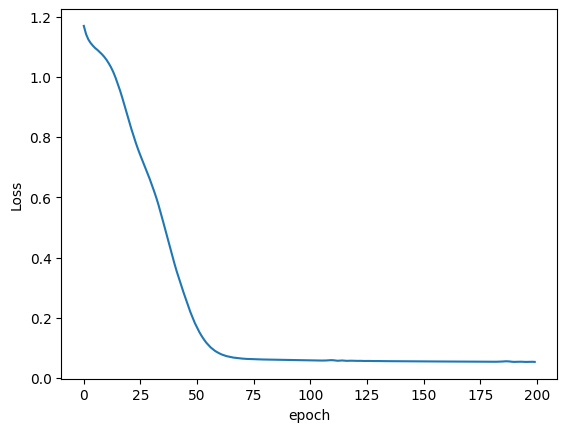

In [14]:
plt.plot(range(epochs),losses)
plt.ylabel("Loss")
plt.xlabel("epoch")
plt.show()

<hr>

***Evaluating the model***

**Evaluating the model on the test data and calculating the loss**

In [15]:
with torch.no_grad():
    y_eval=model.forward(X_test)
    loss=crit(y_eval,y_test)


In [16]:
loss

tensor(0.0209)

<hr>

***Saving the neural network model***

In [19]:
torch.save(model.state_dict(),"Basic_neural_network.pt")

**Testing the loading part of the model**

In [20]:
new_model=Model()
new_model.load_state_dict(torch.load("Basic_neural_network.pt"))

C:\Users\Devab\AppData\Local\Temp\ipykernel_18232\1643674482.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  new_model.load_state_dict(torch.load("Basic_neural_network.p

<All keys matched successfully>

In [21]:
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=10, bias=True)
  (fc2): Linear(in_features=10, out_features=10, bias=True)
  (fc3): Linear(in_features=10, out_features=10, bias=True)
  (out): Linear(in_features=10, out_features=3, bias=True)
)